### Imports

In [1]:
import os
import numpy as np
import random

import neat
import visualize
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torch
from torch import nn

BATCH_SIZE = 96

### Loading dataset

In [2]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])  # Flatten the images
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load training and test data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

### Defining fitness function

In [3]:
def eval_genomes(genomes, config):
    criterion = nn.CrossEntropyLoss()
    
    for genome_id, genome in genomes:
        genome.fitness = -0.001
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for i, (image, label) in enumerate(train_data):
            output = net.activate(image)
            genome.fitness -= criterion(torch.tensor(output), torch.tensor(label)).item()
            if i == BATCH_SIZE:
                break
        genome.fitness /= BATCH_SIZE
    
    #  for genome_id, genome in genomes:
    #     genome.fitness = 0.0
    #     net = neat.nn.FeedForwardNetwork.create(genome, config)
    #     correct_guesses = 0
    #     for i, (image, label) in enumerate(train_data):
    #         output = net.activate(image)
    #         if (output.index(max(output)) == label):
    #             correct_guesses += 1
    #         if i == BATCH_SIZE:
    #             break
    #     genome.fitness = correct_guesses / BATCH_SIZE

def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 5 generations.
    winner = p.run(eval_genomes, 10)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    correct_guesses = 0
    
    for i, (image, label) in enumerate(test_data):
        output = winner_net.activate(image)
        # print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))
        if (output.index(max(output)) == label):
            correct_guesses += 1
        if i == BATCH_SIZE:
            break
    
    print(f'Test Accuracy: {correct_guesses / BATCH_SIZE * 100 :.2f}%')

    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

### Running the algorithm


 ****** Running generation 0 ****** 

Population's average fitness: -2.39564 stdev: 0.03692
Best fitness: -2.29020 - size: (11, 794) - species 1 - id 67
Average adjusted fitness: 0.092
Mean genetic distance 1.907, standard deviation 0.632
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150     -2.3    0.092     0
Total extinctions: 0
Generation time: 396.840 sec

 ****** Running generation 1 ****** 

Population's average fitness: -2.35646 stdev: 0.04028
Best fitness: -2.26993 - size: (11, 792) - species 1 - id 268
Average adjusted fitness: 0.098
Mean genetic distance 1.372, standard deviation 0.366
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150     -2.3    0.098     0
Total extinctions: 0
Generation time: 327.694 sec (362.267 average)

 ****** Running generation 2 ****** 

Population's average fitness: 

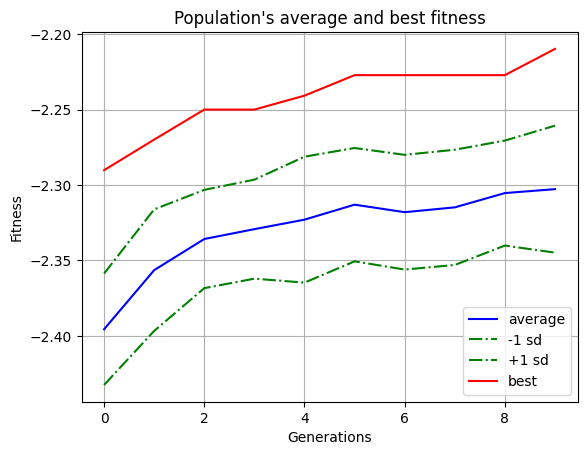

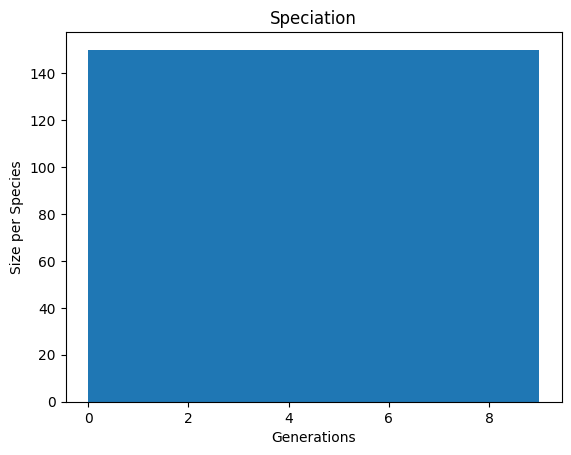

In [4]:
if __name__ == '__main__':
    config_path = os.path.join("", 'config-mnist.txt')
    run(config_path)